In [507]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import hinge_loss
from AEspeech import AEspeech
import pdb
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.svm import SVC
from scipy import stats
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import joblib

In [530]:
PATH=os.getcwd()

rep='CAE'
spk_typ='mc_fuse'
hc_res_path=PATH+'/pdSpanish/feats/pataka_test/'+spk_typ+'_'+rep+'_pdFeats.pickle'
hc_narrowband_results=pd.read_pickle(hc_res_path)

bm_res_path=PATH+'/pdSpanish/feats/pataka_test/'+spk_typ+'_'+rep+'_pdFeats.pickle'
bm_narrowband_results=pd.read_pickle(hc_res_path)

In [531]:
hc_narrowband_results['error'].shape

(302, 256)

In [510]:
"""
Specify rep choice: <'narrowband', 'broadband', 'wvlt', 'early_fuse2/3', 'late_fuse2/3', 'mc_fuse'>
mc_fuse: multi-channel fusion
fuse2/3: 2 utilized only narrowband/broadband, 3 included wvlt
"""

PATH=os.getcwd()

rep='narrowband'
# spk_typ='hc'
# hc_res_path=PATH+'/pdSpanish/speech/pataka/diff_recon/'+spk_typ+'_'+rep+'_synthesisData.pkl'
# hc_narrowband_results=pd.read_pickle(hc_res_path)

spk_typ='pd'
pd_res_path=PATH+'/pdSpanish/speech/pataka/diff_recon/'+spk_typ+'_'+rep+'_synthesisData.pkl'
pd_narrowband_results=pd.read_pickle(pd_res_path)

pd_narrowband_ori_results=pd_narrowband_results.iloc[::2]
pd_narrowband_recon_results=pd_narrowband_results.iloc[1::2]
# hc_narrowband_ori_results=hc_narrowband_results.iloc[::2]
# hc_narrowband_recon_results=hc_narrowband_results.iloc[1::2]

rep='broadband'
# spk_typ='hc'
# hc_res_path=PATH+'/pdSpanish/speech/pataka/diff_recon/'+spk_typ+'_'+rep+'_synthesisData.pkl'
# hc_broadband_results=pd.read_pickle(hc_res_path)

spk_typ='pd'
pd_res_path=PATH+'/pdSpanish/speech/pataka/diff_recon/'+spk_typ+'_'+rep+'_synthesisData.pkl'
pd_broadband_results=pd.read_pickle(pd_res_path)

pd_broadband_ori_results=pd_broadband_results.iloc[::2]
pd_broadband_recon_results=pd_broadband_results.iloc[1::2]
# hc_broadband_ori_results=hc_broadband_results.iloc[::2]
# hc_broadband_recon_results=hc_broadband_results.iloc[1::2]

In [512]:
pd_narrowband_recon_results

,audio_names,STOI,consonantal,back,anterior,open,close,stop,nasal,continuant,lateral,flap,trill,voice,strident,labial,dental,velar,pause,vocalic
1,001_ddk1_PCGITA,0.325636,"[0.37625566, 0.0021087436]","[0.61033773, 0.0025823372]","[0.005803286, 0.00027722967]","[0.61778355, 0.004929385]","[0.0069017815, 0.0004844073]","[0.37512022, 0.0036762555]","[0.16674726, 0.00212583]","[0.11975305, 0.016907567]","[0.051658507, 0.0027790419]","[0.046544615, 0.0052894503]","[0.0072738077, 1.5455461e-07]","[0.59011066, 0.0019541043]","[0.00036348126, 0.011493263]","[0.15129727, 0.006542306]","[0.119878806, 8.554506e-05]","[0.17266122, 0.005239473]","[0.10309563, 0.9984721]","[0.5920773, 0.002326523]"
3,002_ddk1_PCGITA,0.448533,"[0.27827027, 0.0013643188]","[0.37764287, 0.0012248893]","[0.09731692, 0.00081163546]","[0.40777677, 0.0017433077]","[0.02877512, 0.00012530231]","[0.20667778, 0.00040157093]","[0.19485363, 5.7017478e-05]","[0.091529116, 0.01070787]","[0.11754385, 0.00035178775]","[0.060108867, 0.00020257462]","[0.00025606048, 3.1869565e-06]","[0.5308642, 0.0008746022]","[0.037781715, 0.0024542888]","[0.15488756, 0.004023503]","[0.05380126, 3.4498113e-05]","[0.07403657, 0.00019403787]","[0.3667369, 0.99943244]","[0.39062917, 0.001778361]"
5,003_ddk1_PCGITA,0.447049,"[0.3161168, 0.0012535964]","[0.09411363, 0.0006468841]","[0.39819455, 0.00058555364]","[0.3553278, 0.0009400534]","[0.09186995, 3.4060195e-05]","[0.2381073, 0.0003193085]","[0.11888365, 6.7291116e-06]","[0.08571612, 0.015476475]","[0.09572751, 4.807079e-05]","[0.07236279, 9.83839e-05]","[0.00032865943, 4.037749e-07]","[0.44277376, 0.00030220716]","[0.025580117, 0.0038822927]","[0.026130004, 0.0013169252]","[0.19797046, 4.3946708e-05]","[0.10428979, 0.00042961552]","[0.4171909, 0.99950886]","[0.3348189, 0.00086697267]"
7,004_ddk1_PCGITA,0.053250,"[0.50521076, 0.0013947143]","[0.39045873, 0.00079487]","[0.18054006, 0.00063512346]","[0.42616397, 0.0011611475]","[0.09642509, 5.3317835e-05]","[0.37136993, 0.00029460905]","[0.18586282, 1.171377e-05]","[0.47574234, 0.013905464]","[0.10160564, 9.546467e-05]","[0.29410264, 9.669319e-05]","[0.05252264, 2.3196362e-06]","[0.51251215, 0.0005094429]","[0.34312618, 0.00562999]","[0.28518987, 0.0022618496]","[0.2123089, 7.441253e-05]","[0.11729219, 0.0002248028]","[0.15891565, 0.99965924]","[0.40066332, 0.001056692]"
9,005_ddk1_PCGITA,0.311913,"[0.5724235, 0.0022572516]","[0.47088555, 0.0021106242]","[0.09415027, 0.0009067456]","[0.48082882, 0.0011022794]","[0.036611713, 0.00012322966]","[0.4813149, 0.00024700223]","[0.32732517, 2.029464e-05]","[0.10215694, 0.018072322]","[0.12058998, 0.0004085737]","[0.18857816, 0.00051013293]","[7.133107e-05, 3.7940615e-06]","[0.6033195, 0.0006059181]","[0.0063130874, 0.006034145]","[0.20983896, 0.014307686]","[0.22880223, 0.00046821864]","[0.20041546, 3.7158497e-05]","[0.012683206, 0.9995327]","[0.47289547, 0.0012733222]"
11,006_ddk1_PCGITA,0.325684,"[0.51152384, 0.0050367266]","[0.52909553, 0.0049630646]","[0.10497614, 0.004999324]","[0.5129532, 0.0076840348]","[0.08050575, 0.009371207]","[0.46286753, 0.0035792384]","[0.14483862, 0.00054785993]","[0.2875167, 0.01699263]","[0.14584433, 0.00051093294]","[0.17393932, 0.0027248124]","[0.008169145, 6.9174956e-07]","[0.6858422, 0.0072150147]","[0.035503704, 0.00856853]","[0.23899831, 0.008149315]","[0.23905459, 0.0035940742]","[0.14536092, 0.0023301966]","[0.057996538, 0.98967475]","[0.5222207, 0.008433742]"
13,007_ddk1_PCGITA,0.284310,"[0.49039295, 0.0041021234]","[0.61738163, 0.002680416]","[0.07725957, 0.0012725696]","[0.57591355, 0.005392735]","[0.035032764, 0.0035108915]","[0.43028188, 0.008105541]","[0.100930266, 2.8829143e-05]","[0.24003571, 0.0043028514]","[0.14875828, 0.0040300107]","[0.2875299, 0.002712409]","[0.014840691, 1.5443597e-08]","[0.66560256, 0.0021742568]","[0.03935433, 0.00014777934]","[0.22277676, 0.002965903]","[0.28189448, 0.0012158866]","[0.13190447, 0.010939158]","[0.06089688, 0.9994898]","[0.57037324, 0.001435362]"
15,008_ddk1_PC

In [491]:
# pd_narrowband_ori_results=pd_narrowband_ori_results.loc[:,~pd_narrowband_ori_results.columns.duplicated()]
# pd_broadband_ori_results=pd_broadband_ori_results.loc[:,~pd_broadband_ori_results.columns.duplicated()]
# pd_narrowband_recon_results=pd_narrowband_recon_results.loc[:,~pd_narrowband_recon_results.columns.duplicated()]
# pd_broadband_recon_results=pd_broadband_recon_results.loc[:,~pd_broadband_recon_results.columns.duplicated()]

In [498]:
phon_ori_tbl=pd.DataFrame(index=pd_broadband_ori_results.columns[2:], columns=['bb_mean','nb_mean','tstat','pval'])
phon_recon_tbl=pd.DataFrame(index=pd_broadband_recon_results.columns[2:], columns=['bb_mean','nb_mean','tstat','pval'])

phon_ori_tbl['bb_mean']=pd_broadband_ori_results.mean().str[1]
phon_ori_tbl['nb_mean']=pd_narrowband_ori_results.mean().str[1]
phon_recon_tbl['bb_mean']=pd_broadband_recon_results.mean().str[1]
phon_recon_tbl['nb_mean']=pd_narrowband_recon_results.mean().str[1]

for ind in phon_ori_tbl.index:
    phon_ori_tbl['tstat'][ind]=stats.ttest_ind(pd_broadband_ori_results[ind].str[1],pd_narrowband_ori_results[ind].str[1]).statistic
    phon_ori_tbl['pval'][ind]=stats.ttest_ind(pd_broadband_ori_results[ind].str[1],pd_narrowband_ori_results[ind].str[1]).pvalue
    phon_recon_tbl['tstat'][ind]=stats.ttest_ind(pd_broadband_recon_results[ind].str[1],pd_narrowband_recon_results[ind].str[1],).statistic
    phon_recon_tbl['pval'][ind]=stats.ttest_ind(pd_broadband_recon_results[ind].str[1],pd_narrowband_recon_results[ind].str[1]).pvalue


C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gabriel\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [506]:
phon_ori_tbl.round(2).sort_values('tstat',ascending=False).round(2)

,bb_mean,nb_mean,tstat,pval
open,0.58,0.43,11.9509,7.6292e-21
vocalic,0.56,0.43,11.5809,4.69597e-20
voice,0.66,0.53,7.77472,7.64792e-12
back,0.54,0.40,6.7841,8.93112e-10
dental,0.24,0.19,3.39748,0.000984162
anterior,0.20,0.14,3.18919,0.00191612
continuant,0.24,0.22,1.24805,0.214987
trill,0.01,0.01,0.638719,0.524496
flap,0.22,0.21,0.631051,0.529477
strident,0.07,0.07,0.531893,0.596004


One sided T-test to determine if difference results are significant.
Null Hypothesis: difference between representations
 is not significant.
 Bb Mean: 0.142 Nb Mean: 0.137
 T-test stat: 0.398 p-value: 0.6916


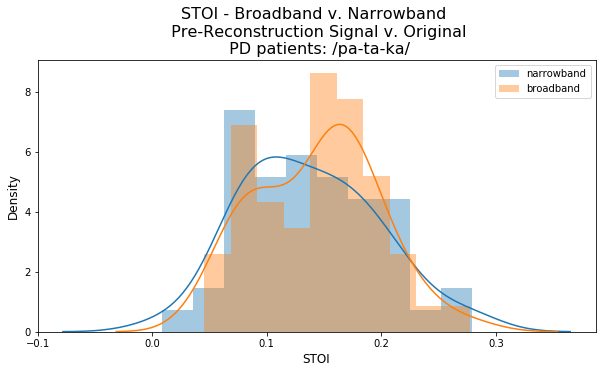

In [500]:
"""
Comparing reconstructed, synthesized, broadband signals and reconstructed, synthesized, narrowband signals
"""
measure='STOI'

nbmeans=[]
bbmeans=[]
if measure != 'STOI':
    for itr in range(50):
        nbmeans.append(list(pd_narrowband_ori_results[measure])[itr][0])
        bbmeans.append(list(pd_broadband_ori_results[measure])[itr][0])
else:
    nbmeans=list(pd_narrowband_ori_results[measure])
    bbmeans=list(pd_broadband_ori_results[measure])
plt.figure(figsize= (10,5))
plt.title(measure+' - Broadband v. Narrowband \n Pre-Reconstruction Signal v. Original\n PD patients: /pa-ta-ka/', fontsize=16)

ax = sns.distplot(np.abs(nbmeans), bins = 10, label = 'narrowband', norm_hist = False)
if measure!='STOI':
    plt.xlabel("Abs. Difference in "+str(measure), fontsize=12)
else:
    plt.xlabel("STOI", fontsize=12)
plt.ylabel("Density", fontsize=12)
sns.distplot(np.abs(bbmeans),  bins = 10, label = 'broadband', norm_hist = False)
plt.legend()

print('One sided T-test to determine if difference results'+
      ' are significant.\nNull Hypothesis: difference between representations'+
      '\n is not significant.\n Bb Mean: '+str(np.round(np.mean(bbmeans),3))+' Nb Mean: '+str(np.round(np.mean(nbmeans),3))+'\n T-test stat: '+
      str(np.round(np.abs(stats.ttest_ind(nbmeans,bbmeans).statistic),3))+
      ' p-value: '+str(np.round(np.abs(stats.ttest_ind(nbmeans,bbmeans).pvalue),4)))

One sided T-test to determine if difference results are significant.
Null Hypothesis: difference between representationsis not significant.
 Bb Mean: 0.153 Nb Mean: 0.268
 T-test stat: 6.605 p-value: 2.1e-09


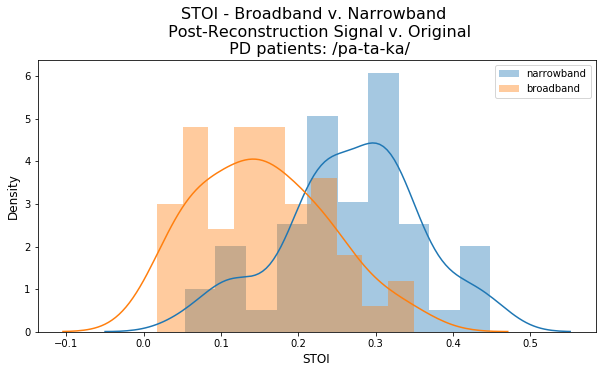

In [501]:
"""
Comparing reconstructed, synthesized, broadband signals and reconstructed, synthesized, narrowband signals
"""

measure='STOI'

nbmeans=[]
bbmeans=[]
if measure != 'STOI':
    for itr in range(50):
        nbmeans.append(list(pd_narrowband_recon_results[measure])[itr][0])
        bbmeans.append(list(pd_broadband_recon_results[measure])[itr][0])
else:
    nbmeans=list(pd_narrowband_recon_results[measure])
    bbmeans=list(pd_broadband_recon_results[measure])
plt.figure(figsize= (10,5))
plt.title(measure+' - Broadband v. Narrowband \n Post-Reconstruction Signal v. Original\n PD patients: /pa-ta-ka/', fontsize=16)

ax = sns.distplot(np.abs(nbmeans), bins = 10, label = 'narrowband', norm_hist = False)
if measure!='STOI':
    plt.xlabel("Abs. Difference in "+str(measure), fontsize=12)
else:
    plt.xlabel("STOI", fontsize=12)
plt.ylabel("Density", fontsize=12)
sns.distplot(np.abs(bbmeans),  bins = 10, label = 'broadband', norm_hist = False)
plt.legend()

print('One sided T-test to determine if difference results'+
      ' are significant.\nNull Hypothesis: difference between representations'+
      'is not significant.\n Bb Mean: '+str(np.round(np.mean(bbmeans),3))+' Nb Mean: '+str(np.round(np.mean(nbmeans),3))+'\n T-test stat: '+
      str(np.round(np.abs(stats.ttest_ind(nbmeans,bbmeans).statistic),3))+
      ' p-value: '+str(np.round(np.abs(stats.ttest_ind(nbmeans,bbmeans).pvalue),10)))

In [416]:
print('One sided T-test to determine if difference results'+
      ' are significant.\nNull Hypothesis: difference between representations'+
      '\n is not significant.\n Bb Mean: '+str(np.mean(bbmeans))+' Nb Mean: '+str(np.mean(nbmeans))+'\n T-test stat: '+
      str(np.round(np.abs(stats.ttest_ind(nbmeans,bbmeans).statistic),3))+
      ' p-value: '+str(np.round(np.abs(stats.ttest_ind(nbmeans,bbmeans).pvalue),12)))


# """KL divergence to compare difference in original synthesized signal and reconstructed"""
# from math import log2
# def kl_divergence(p, q):
#     return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# print("\n KL Divergence between Distributions: "+ str(kl_divergence(nbmeans/np.sum(nbmeans),bbmeans/np.sum(bbmeans))))

One sided T-test to determine if difference results are significant.
Null Hypothesis: difference between representations
 is not significant.
 Bb Mean: 0.16227165758035586 Nb Mean: 0.26381739137889826
 T-test stat: 6.114 p-value: 1.9804e-08


STOI                               0.152927
consonantal       [0.16250107, 0.043444704]
back               [0.17704302, 0.05892359]
anterior       [-0.007924234, 0.0032848208]
open               [0.18111163, 0.05581847]
close           [0.011078415, 0.0040057674]
stop                [0.16225353, 0.0475676]
nasal              [0.09032182, 0.05008903]
stop                [0.16225353, 0.0475676]
continuant     [-0.08429366, -0.0032020237]
lateral            [0.0410401, 0.019301951]
flap              [0.023440469, 0.01924273]
trill            [0.012109485, 0.008064102]
voice              [0.21230969, 0.06696112]
strident       [-0.033874784, -0.014129979]
labial            [0.10614358, 0.056088854]
dental             [0.05663193, 0.04106847]
velar            [0.093857124, 0.056689166]
pause            [-0.40266895, 0.015949879]
vocalic           [0.16786624, 0.053528428]
dtype: object


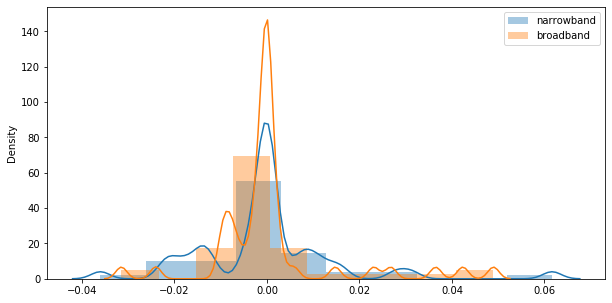

In [155]:
"""
Comparing original synthesized broadband and original synthesized narrowband signals
"""

print(pd_narrowband_results.mean())
measure='trill'

nbmeans=[]
bbmeans=[]
if measure != 'STOI':
    for itr in range(50):
        nbmeans.append(list(pd_narrowband_ori_results[measure])[itr][0])
        bbmeans.append(list(pd_broadband_ori_results[measure])[itr][0])
else:
    nbmeans=list(pd_narrowband_ori_results[measure])
    bbmeans=list(pd_broadband_ori_results[measure])
plt.figure(figsize= (10,5))
# plt.title(lang_obj.lang.capitalize()+' Speakers \n'+title_xtra)
ax = sns.distplot(np.abs(nbmeans), bins = 10, label = 'narrowband', norm_hist = False)
plt.xlabel("Abs. Difference from Original Time Domain Signal's Phoneme Posteriors")
plt.ylabel("Density")
sns.distplot(np.abs(bbmeans),  bins = 10, label = 'broadband', norm_hist = False)
plt.legend()

STOI                               0.151468
consonantal       [0.16938351, 0.044163037]
back                [0.1819275, 0.05982535]
anterior       [-0.0075236345, 0.003340818]
open               [0.18917164, 0.05550157]
close           [0.009438446, 0.0026293278]
stop               [0.17221802, 0.04933781]
nasal             [0.08649105, 0.046930656]
stop               [0.17221802, 0.04933781]
continuant     [-0.081785515, -0.005225312]
lateral          [0.037035767, 0.017535165]
flap               [0.03015572, 0.02109294]
trill           [0.010626424, 0.0070000943]
voice              [0.21563086, 0.06665278]
strident       [-0.035595343, -0.015912186]
labial            [0.10102037, 0.055958107]
dental            [0.06275486, 0.044064097]
velar             [0.09702385, 0.057808112]
pause             [-0.40920982, 0.01613245]
vocalic            [0.1750347, 0.054605402]
dtype: object


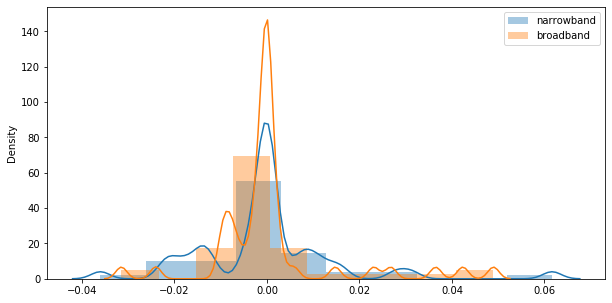

In [160]:
"""
Comparing original synthesized broadband and original synthesized narrowband signals
"""

print(pd_narrowband_results.mean())
measure='trill'

nbmeans=[]
bbmeans=[]
if measure != 'STOI':
    for itr in range(50):
        nbmeans.append(list(hc_narrowband_ori_results[measure])[itr][0])
        bbmeans.append(list(hc_broadband_ori_results[measure])[itr][0])
else:
    nbmeans=list(hc_narrowband_ori_results[measure])
    bbmeans=list(hc_broadband_ori_results[measure])
plt.figure(figsize= (10,5))
# plt.title(lang_obj.lang.capitalize()+' Speakers \n'+title_xtra)
ax = sns.distplot(np.abs(nbmeans), bins = 10, label = 'narrowband', norm_hist = False)
plt.xlabel("Abs. Difference from Original Time Domain Signal's Phoneme Posteriors")
plt.ylabel("Density")
sns.distplot(np.abs(bbmeans),  bins = 10, label = 'broadband', norm_hist = False)
plt.legend()

STOI                               0.152927
consonantal       [0.16250107, 0.043444704]
back               [0.17704302, 0.05892359]
anterior       [-0.007924234, 0.0032848208]
open               [0.18111163, 0.05581847]
close           [0.011078415, 0.0040057674]
stop                [0.16225353, 0.0475676]
nasal              [0.09032182, 0.05008903]
stop                [0.16225353, 0.0475676]
continuant     [-0.08429366, -0.0032020237]
lateral            [0.0410401, 0.019301951]
flap              [0.023440469, 0.01924273]
trill            [0.012109485, 0.008064102]
voice              [0.21230969, 0.06696112]
strident       [-0.033874784, -0.014129979]
labial            [0.10614358, 0.056088854]
dental             [0.05663193, 0.04106847]
velar            [0.093857124, 0.056689166]
pause            [-0.40266895, 0.015949879]
vocalic           [0.16786624, 0.053528428]
dtype: object


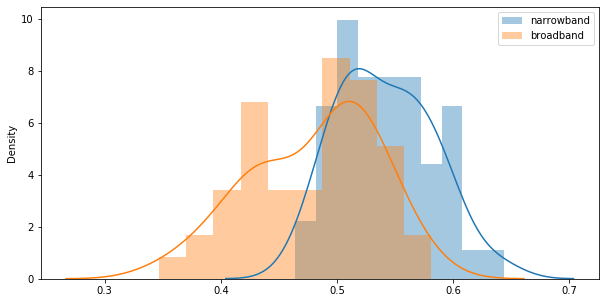

In [157]:
"""
Comparing reconstructed, synthesized, broadband signals and reconstructed, synthesized, narrowband signals
"""

print(pd_narrowband_results.mean())
measure='open'

nbmeans=[]
bbmeans=[]
if measure != 'STOI':
    for itr in range(50):
        nbmeans.append(list(hc_narrowband_recon_results[measure])[itr][0])
        bbmeans.append(list(hc_broadband_recon_results[measure])[itr][0])
else:
    nbmeans=list(hc_narrowband_recon_results[measure])
    bbmeans=list(hc_broadband_recon_results[measure])
plt.figure(figsize= (10,5))
# plt.title(lang_obj.lang.capitalize()+' Speakers \n'+title_xtra)
ax = sns.distplot(np.abs(nbmeans), bins = 10, label = 'narrowband', norm_hist = False)
plt.xlabel("Abs. Difference from Original Time Domain Signal's Phoneme Posteriors")
plt.ylabel("Density")
sns.distplot(np.abs(bbmeans),  bins = 10, label = 'broadband', norm_hist = False)
plt.legend()

STOI                               0.199329
consonantal        [0.25409284, 0.06854443]
back                [0.2813129, 0.06928411]
anterior         [0.046776224, 0.017031733]
open               [0.28678054, 0.06775647]
close           [0.0145267965, 0.003675134]
stop               [0.23965727, 0.07535945]
nasal            [0.091166064, 0.048995208]
stop               [0.23965727, 0.07535945]
continuant        [0.083512746, 0.02552627]
lateral           [0.053340387, 0.02423018]
flap              [0.08494142, 0.034812722]
trill            [0.014371769, 0.009004335]
voice              [0.3090072, 0.061673023]
strident         [0.024436373, 0.013131616]
labial           [0.088233665, 0.058549076]
dental            [0.12559877, 0.063705795]
velar              [0.115079544, 0.0682295]
pause          [-0.49507153, -0.0016407802]
vocalic             [0.2747573, 0.07044558]
dtype: object


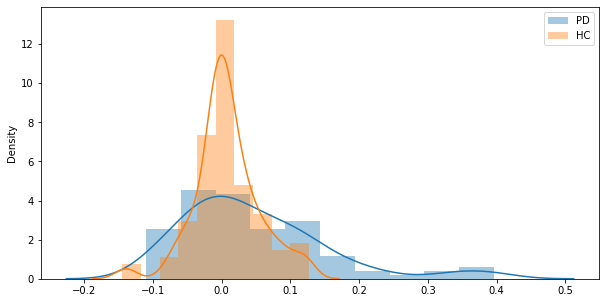

In [121]:
#Comparing PD/HC

print(pd_narrowband_results.mean())
measure='anterior'

pd_means=[]
hc_means=[]
if measure != 'STOI':
    for itr in range(100):
        pd_means.append(list(pd_narrowband_results[measure])[itr][0])
        hc_means.append(list(hc_narrowband_results[measure])[itr][0])
else:
    pd_means=list(pd_narrowband_results[measure])
    hc_means=list(hc_narrowband_results[measure])
plt.figure(figsize= (10,5))
# plt.title(lang_obj.lang.capitalize()+' Speakers \n'+title_xtra)
ax = sns.distplot(pd_means, bins = 10, label = 'PD', norm_hist = False)
# plt.xlabel(xlab)
plt.ylabel("Density")
sns.distplot(hc_means,  bins = 10, label = 'HC', norm_hist = False)
plt.legend()